# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
# Open the csv file
df_archive_enhanced= pd.read_csv('twitter-archive-enhanced.csv')
df_archive_enhanced.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [11]:
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [12]:
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    
    image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')

image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [14]:
!pip install tweepy

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [13]:
# Download file using Requests library via URL provided 
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)

# Save the file
with open('tweet-json.txt', mode = 'wb') as file:
    file.write(response.content)

In [14]:
import json
# Read downloaded txt file line by line into a pandas DataFrame
df_list = []
with open('tweet-json.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        parsed_json = json.loads(line)
        df_list.append({'tweet_id': parsed_json['id'],
                        'retweet_count': parsed_json['retweet_count'],
                        'favorite_count': parsed_json['favorite_count']})
        
tweet_json = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### Assessing is the second step in the data wrangling process. 

 Quality: issues with content. Low quality data is also known as dirty data.

- Completeness
- Validity
- Accuracy
- Consistency

Tidiness: issues with structure that prevent easy analysis. Untidy data is also known as messy data. 
 
Tidy data requirements:
- Each variable forms a column.
- Each observation forms a row.
- Each type of observational unit forms a table.

### Visual assessment

In [6]:
df_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [8]:
tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


### Programmatic assessment

In [9]:
df_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
print(df_archive_enhanced['name'].value_counts())

None              745
a                  55
Charlie            12
Cooper             11
Lucy               11
Oliver             11
Penny              10
Tucker             10
Lola               10
Winston             9
Bo                  9
Sadie               8
the                 8
Bailey              7
Buddy               7
Daisy               7
an                  7
Toby                7
Leo                 6
Stanley             6
Jax                 6
Milo                6
Oscar               6
Bella               6
Koda                6
Scout               6
Dave                6
Rusty               6
Jack                6
Louis               5
                 ... 
Tycho               1
Pumpkin             1
Cheryl              1
Tonks               1
Amy                 1
Vixen               1
Tiger               1
Naphaniel           1
Pete                1
Sky                 1
Mutt                1
Monkey              1
Staniel             1
Suki                1
Jett      

In [19]:
doggo = df_archive_enhanced.doggo.value_counts()
floofer = df_archive_enhanced.floofer.value_counts()
pupper = df_archive_enhanced.pupper.value_counts()
puppo = df_archive_enhanced.puppo.value_counts()
print(puppo)
print(pupper)
print(floofer)
print(doggo)

None     2326
puppo      30
Name: puppo, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None     2259
doggo      97
Name: doggo, dtype: int64


In [10]:
df_archive_enhanced.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
605        1
1446       1
1869       1
2091       1
2038       1
1940       1
1764       2
2310       2
1761       2
1920       2
2246       2
2237       2
2349       2
2326       2
2079       2
2305       3
1249       3
1898       3
1478       3
1692       3
2202       3
765        3
1928       3
1314       3
2183       3
        ... 
866       14
83        14
291       15
285       15
55        17
1663      20
516       24
1712      26
763       27
1433      44
1274      45
1202      50
1351      60
340       75
695       75
1254      80
433       84
1843      88
1228      99
1635     121
1634     143
1779     144
902      165
290      182
1120     204
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [11]:
df_archive_enhanced.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
1574     10
1573     10
1572     10
1563     10
1570     10
1569     10
1568     10
1567     10
1566     10
1565     10
1564     10
1577     10
1571     10
0        10
1562     10
1547     10
1548     10
1549     10
1550     10
1551     10
1552     10
1553     10
1554     10
1555     10
1556     10
       ... 
782      10
781      10
775      10
799      10
780      10
779      10
776      10
777      10
778      10
800      10
784      11
1068     11
1662     11
342      15
1663     16
1165     20
1598     20
1433     40
1202     50
1351     50
1274     50
433      70
1843     80
1254     80
1228     90
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [12]:
df_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
df_archive_enhanced['tweet_id'].duplicated().sum()

0

In [14]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
image_prediction['tweet_id'].duplicated().sum()

0

In [14]:
image_prediction.loc[image_prediction['p2_conf']>0.95]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [15]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [17]:
tweet_json['tweet_id'].duplicated().sum()

0

In [18]:
tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Quality issues

#### df_archive_enhanced table 

1. retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp	are useless columns.

2. Erroneous datatypes ( timestamp ) should be of type date. 

3. Erroneous datatypes(floofer, pupper and puppo) should be category data type. 

4. Erroneous datatypes (tweet_id, in_reply_to_status_id, in_reply_to_user_id and columns) should be of type object (string). 

5. Unreal rating_denominator values (Equal 0).

6. Unreal rating_numerator values( Equal 1776).

7. Missing information for the dog stages.


#### image_prediction table
8. Erroneous datatypes (tweet_id) should be of type object (string). 
9. Some rows are have the value false for p1_dog, p2_dog and p3_dog so they are not dogs. 

#### tweet_json table 

10. Erroneous datatypes (tweet_id) should be of type object (string).

### Tidiness issues
1. df_archive_enhanced, image_prediction and tweet_json tabels should be in one table.

2. doggo, floofer, pupper and puppo should be in one Column.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

#### The programmatic data cleaning process:

- Define: convert our assessments into defined cleaning tasks.
- Code: convert those definitions to code and run that code.
- Test: test the dataset, visually or with code, to make sure the cleaning operations worked.

In [15]:
# Make copies of original pieces of data
df_archive_enhanced_clean = df_archive_enhanced.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

### Issue #1: retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp are useless columns.

#### Define:  Reomve retweets Columns using isnull and drop method, only want original ratings (no retweets).

#### Code

In [16]:
df_archive_enhanced_clean = df_archive_enhanced_clean[df_archive_enhanced_clean.retweeted_status_id.isnull()]
df_archive_enhanced_clean = df_archive_enhanced_clean[df_archive_enhanced_clean.in_reply_to_status_id.isnull()]

In [17]:

df_archive_enhanced_clean = df_archive_enhanced_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

#### Test

In [18]:
df_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


In [36]:
df_archive_enhanced_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### Issue #2: Erroneous datatypes ( timestamp ) should be of type date.

#### Define: Convert the timestamp column's data type from a object to a datetime using astype, remove the '0000' using string slicing.

#### Code

In [19]:
df_archive_enhanced_clean['timestamp'] = df_archive_enhanced_clean['timestamp'].str[:-5]

In [20]:
df_archive_enhanced_clean['timestamp'] = df_archive_enhanced_clean['timestamp'].astype('datetime64[ns]')

#### Test

In [21]:
df_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


### Issue #3: Some rows  have the value false for p1_dog, p2_dog and p3_dog so they are not dogs.

#### Define:  use drop method to drop columns that have the value false for p1_dog, p2_dog and p3_dog.

#### Code

In [22]:
image_prediction_clean = image_prediction_clean.drop(image_prediction_clean[(((image_prediction_clean.p1_dog == False) & (image_prediction_clean.p2_dog == False )& (image_prediction_clean.p3_dog == False) ))].index)

#### Test

In [23]:
image_prediction_clean[(((image_prediction_clean.p1_dog == False) & (image_prediction_clean.p2_dog == False )& (image_prediction_clean.p3_dog == False) ))].count()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

### Issue #4: Unreal rating_denominator values (Equal 0).

#### Define:  Use drop method to drop rows that have the value rating_denominator not equal 10.

#### Code

In [25]:
df_archive_enhanced_clean = df_archive_enhanced_clean.drop(df_archive_enhanced_clean[((df_archive_enhanced_clean.rating_denominator != 10))].index)

#### Test

In [26]:
df_archive_enhanced_clean[((df_archive_enhanced_clean.rating_denominator != 10))].count()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

### Issue #5: Unreal rating_numerator values (Equal 1776 ).

#### Define:  Use drop method to rows columns that have the value rating_numerator greater than 19.

#### Code

In [27]:
df_archive_enhanced_clean = df_archive_enhanced_clean.drop(df_archive_enhanced_clean[((df_archive_enhanced_clean.rating_numerator >= 20))].index)

#### Test 

In [28]:
df_archive_enhanced_clean[((df_archive_enhanced_clean.rating_denominator >= 20))].count()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

In [29]:
df_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2075 non-null int64
timestamp             2075 non-null datetime64[ns]
source                2075 non-null object
text                  2075 non-null object
expanded_urls         2072 non-null object
rating_numerator      2075 non-null int64
rating_denominator    2075 non-null int64
name                  2075 non-null object
doggo                 2075 non-null object
floofer               2075 non-null object
pupper                2075 non-null object
puppo                 2075 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 210.7+ KB


### Issue #6: Erroneous datatypes (tweet_id) should be of type object (string).

#### Define: In the df_archive_enhanced_clean table,  image_prediction_clean table  and tweet_json_clean table, change the dtype of column tweet_id,  from int64 to object,  using the astype() function. 

#### Code

In [31]:
df_archive_enhanced_clean['tweet_id'] = df_archive_enhanced_clean['tweet_id'].astype('str')

image_prediction_clean['tweet_id'] = image_prediction_clean['tweet_id'].astype('str')
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype('str')


#### Test

In [32]:
df_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2075 non-null object
timestamp             2075 non-null datetime64[ns]
source                2075 non-null object
text                  2075 non-null object
expanded_urls         2072 non-null object
rating_numerator      2075 non-null int64
rating_denominator    2075 non-null int64
name                  2075 non-null object
doggo                 2075 non-null object
floofer               2075 non-null object
pupper                2075 non-null object
puppo                 2075 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 210.7+ KB


In [33]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1751 non-null object
jpg_url     1751 non-null object
img_num     1751 non-null int64
p1          1751 non-null object
p1_conf     1751 non-null float64
p1_dog      1751 non-null bool
p2          1751 non-null object
p2_conf     1751 non-null float64
p2_dog      1751 non-null bool
p3          1751 non-null object
p3_conf     1751 non-null float64
p3_dog      1751 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 141.9+ KB


In [34]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### Issue #7: Missing information for the dog stages.

#### Define: Use drop method to drop rows that have none value for  doggo, floofer, puppera and puppo columns.

#### Code

In [36]:
df_archive_enhanced_clean = df_archive_enhanced_clean.drop(df_archive_enhanced_clean[(((df_archive_enhanced_clean.doggo == 'None') & (df_archive_enhanced_clean.floofer == 'None' )& (df_archive_enhanced_clean.pupper == 'None')&(df_archive_enhanced_clean.puppo == 'None') ))].index)

#### Test

In [37]:
df_archive_enhanced_clean[(((df_archive_enhanced_clean.doggo == 'None') & (df_archive_enhanced_clean.floofer == 'None' )& (df_archive_enhanced_clean.pupper == 'None')&(df_archive_enhanced_clean.puppo == 'None') ))].count()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

In [38]:
df_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 9 to 2017
Data columns (total 12 columns):
tweet_id              335 non-null object
timestamp             335 non-null datetime64[ns]
source                335 non-null object
text                  335 non-null object
expanded_urls         334 non-null object
rating_numerator      335 non-null int64
rating_denominator    335 non-null int64
name                  335 non-null object
doggo                 335 non-null object
floofer               335 non-null object
pupper                335 non-null object
puppo                 335 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 34.0+ KB


In [39]:
doggo = df_archive_enhanced_clean.doggo.value_counts()
floofer = df_archive_enhanced_clean.floofer.value_counts()
pupper = df_archive_enhanced_clean.pupper.value_counts()
puppo = df_archive_enhanced_clean.puppo.value_counts()
print(puppo)
print(pupper)
print(floofer)
print(doggo)

None     311
puppo     24
Name: puppo, dtype: int64
pupper    229
None      106
Name: pupper, dtype: int64
None       325
floofer     10
Name: floofer, dtype: int64
None     252
doggo     83
Name: doggo, dtype: int64


### Issue #8: doggo, floofer, pupper and puppo should be in one Column.

#### Define: Use pd.melt to melt the doggo, floofer, pupper and puppo columns to a type and dog_stage column. Drop the intermediate column.

#### Code 

In [41]:

df_archive_enhanced_clean = pd.melt(df_archive_enhanced_clean, id_vars=['tweet_id', 'timestamp' , 'source','text' , 'expanded_urls' , 'rating_numerator' ,'rating_denominator' ,'name']
              ,value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], var_name = 'type', value_name = 'dog_stage')
df_archive_enhanced_clean = df_archive_enhanced_clean.drop('type' , axis=1) 

In [42]:
df_archive_enhanced_clean = df_archive_enhanced_clean.sort_values('dog_stage').drop_duplicates(subset='tweet_id', keep='last')

#### Test

In [43]:
df_archive_enhanced_clean.dog_stage.value_counts()

pupper     229
doggo       72
puppo       24
floofer     10
Name: dog_stage, dtype: int64

### Issue #9: Erroneous datatypes(floofer, pupper and puppo) should be category data type.

#### Define: In the df_archive_enhanced_clean table, ichange the dtype of column dog_stage, from object  to categorical data type, using the astype() function.

#### Code

In [45]:
df_archive_enhanced_clean.dog_stage = df_archive_enhanced_clean.dog_stage.astype('category')

#### Test

In [46]:
df_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 55 to 1058
Data columns (total 9 columns):
tweet_id              335 non-null object
timestamp             335 non-null datetime64[ns]
source                335 non-null object
text                  335 non-null object
expanded_urls         334 non-null object
rating_numerator      335 non-null int64
rating_denominator    335 non-null int64
name                  335 non-null object
dog_stage             335 non-null category
dtypes: category(1), datetime64[ns](1), int64(2), object(5)
memory usage: 24.1+ KB


In [47]:
df_archive_enhanced_clean.dog_stage.value_counts()

pupper     229
doggo       72
puppo       24
floofer     10
Name: dog_stage, dtype: int64

### Issue #10: df_archive_enhanced, image_prediction and tweet_json tabels should be in one table.

#### Define: Take both the df_archive_enhanced_clean and image_prediction_clean tables and merge into one table using the join() method on the columns tweet_id, then merge it with twitter_image_tweet_json table. 

#### Code 

In [48]:
twitter_image = pd.merge(df_archive_enhanced_clean, image_prediction_clean, on='tweet_id', how='inner')

#### Test

In [49]:
twitter_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 0 to 255
Data columns (total 20 columns):
tweet_id              256 non-null object
timestamp             256 non-null datetime64[ns]
source                256 non-null object
text                  256 non-null object
expanded_urls         256 non-null object
rating_numerator      256 non-null int64
rating_denominator    256 non-null int64
name                  256 non-null object
dog_stage             256 non-null category
jpg_url               256 non-null object
img_num               256 non-null int64
p1                    256 non-null object
p1_conf               256 non-null float64
p1_dog                256 non-null bool
p2                    256 non-null object
p2_conf               256 non-null float64
p2_dog                256 non-null bool
p3                    256 non-null object
p3_conf               256 non-null float64
p3_dog                256 non-null bool
dtypes: bool(3), category(1), datetime64[ns](1), fl

#### Code

In [50]:
twitter_image_tweet_json = pd.merge(twitter_image, tweet_json_clean, on='tweet_id', how='inner')

#### Test

In [51]:
twitter_image_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 0 to 255
Data columns (total 22 columns):
tweet_id              256 non-null object
timestamp             256 non-null datetime64[ns]
source                256 non-null object
text                  256 non-null object
expanded_urls         256 non-null object
rating_numerator      256 non-null int64
rating_denominator    256 non-null int64
name                  256 non-null object
dog_stage             256 non-null category
jpg_url               256 non-null object
img_num               256 non-null int64
p1                    256 non-null object
p1_conf               256 non-null float64
p1_dog                256 non-null bool
p2                    256 non-null object
p2_conf               256 non-null float64
p2_dog                256 non-null bool
p3                    256 non-null object
p3_conf               256 non-null float64
p3_dog                256 non-null bool
retweet_count         256 non-null int64
favorite_c

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [52]:
twitter_image_tweet_json.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [2]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,0,821765923262631936,2017-01-18 17:07:18,"<a href=""http://twitter.com/download/iphone"" r...",This is Duchess. She uses dark doggo forces to...,https://twitter.com/dog_rates/status/821765923...,13,10,Duchess,doggo,...,0.980071,True,Labrador_retriever,0.008758,True,Saluki,0.001806,True,1899,9317
1,1,819004803107983360,2017-01-11 02:15:36,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,...,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True,42228,95450
2,2,826476773533745153,2017-01-31 17:06:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Pilot. He has mastered the synchronize...,https://twitter.com/dog_rates/status/826476773...,12,10,Pilot,doggo,...,0.741860,True,Tibetan_mastiff,0.122812,True,kelpie,0.100460,True,4821,20275
3,3,826204788643753985,2017-01-30 23:05:46,"<a href=""http://twitter.com/download/iphone"" r...","Here's a little more info on Dew, your favorit...",http://us.blastingnews.com/news/2017/01/kentuc...,13,10,None,doggo,...,0.782058,True,golden_retriever,0.156581,True,soft-coated_wheaten_terrier,0.007275,True,1075,5361
4,4,834574053763584002,2017-02-23 01:22:14,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo fully pupared for a shower. H*c...,https://twitter.com/dog_rates/status/834574053...,13,10,None,doggo,...,0.262936,False,golden_retriever,0.226564,True,bathtub,0.078879,False,2882,14993


### Insights:
1. What is the most common dog stage?

2. What is the stage with the highest rate?

3. retweet counts, and favorite counts comparison over time.

4. What is the most popular name for dogs? 

### Visualization

In [11]:
#Importing libraries 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

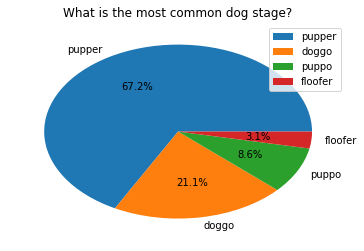

In [8]:
What is the most common dog stage?
mylabels = ['pupper', 'doggo', 'puppo', 'floofer']

plt.pie(df.dog_stage.value_counts(),  autopct='%1.1f%%', labels = mylabels)
plt.title('What is the most common dog stage?')
plt.legend()
plt.show()


##### As illustrated in the above pie chart, pupper dogs take the first place in popularity on the dataset with a percentage of 67.2%, while doggo took the second place with 21.1%, and then puppo with 8.6%, and the least popularity for floofer with 3.1%. 

In [53]:
pupper = df[df['dog_stage']=='pupper'].rating_numerator.mean().round(1)  
doggo = df[df['dog_stage']=='doggo'].rating_numerator.mean().round(1)  
puppo = df[df['dog_stage']=='puppo'].rating_numerator.mean().round(1)  
floofer = df[df['dog_stage']=='floofer'].rating_numerator.mean().round(1)  
pupper ,doggo , puppo, floofer

(10.9, 11.9, 12.0, 11.9)

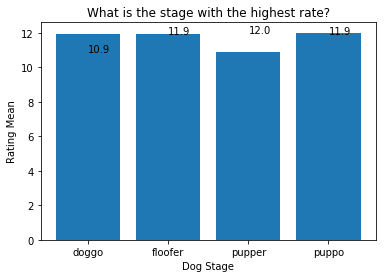

In [54]:

x = ['pupper', 'doggo', 'puppo', 'floofer']
y = [pupper, doggo, puppo, floofer]

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        
plt.bar(x, y)
addlabels(x, y)
plt.title('What is the stage with the highest rate?')
plt.xlabel('Dog Stage')
plt.ylabel('Rating Mean')
plt.show()


##### As illustrated in the above bar chart, pupper dogs take the first place in rating on the dataset with a mean of 12, while floofer and puppo took the second place with a mean of 11.9, and the least rating for doogoe with a mean of 10.9. 

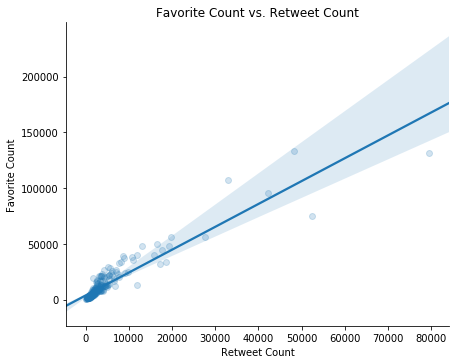

In [13]:
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=df,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5});

plt.title('Favorite Count vs. Retweet Count');
plt.xlabel('Retweet Count');
plt.ylabel('Favorite Count');

##### Favorite counts are correlated with retweet counts - this is a positive correlation.

In [58]:
df.name.value_counts()

None        97
a            4
Cooper       3
just         2
Chuckles     2
Milo         2
the          2
Loki         2
Gus          2
Bo           2
Oliver       2
Blakely      1
Jamesy       1
Aqua         1
Buckley      1
Lucy         1
Ellie        1
Gidget       1
Obie         1
Wally        1
Moose        1
Scott        1
Jax          1
Scout        1
Schnozz      1
Larry        1
Benji        1
Mona         1
one          1
Superpup     1
            ..
Rocky        1
Rover        1
Shikha       1
Chubbs       1
Lillie       1
Pilot        1
Scooter      1
Dido         1
Jed          1
Pablo        1
Diogi        1
Barney       1
Gerbald      1
Edmund       1
Finn         1
Boomer       1
Rizzo        1
Rueben       1
Petrick      1
Huck         1
Mollie       1
Piper        1
Rinna        1
Lenox        1
Meera        1
Winnie       1
Godzilla     1
Louie        1
Kaiya        1
Jeffri       1
Name: name, Length: 147, dtype: int64

##### There is no Special popular name for dogs, and we can use this data to Answer this question is there is to many missing name under none value.